# MPM Two-Phase One Point

In [1]:
# Import Matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.interpolate import spline


## 1D Consolidation Problem

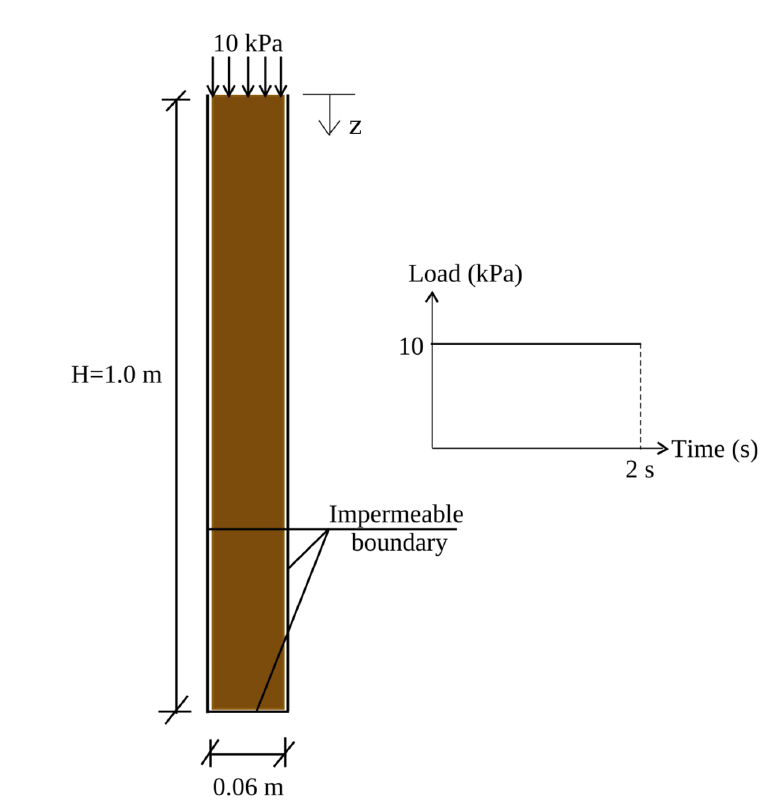

In [2]:
Image("Illustration.png")


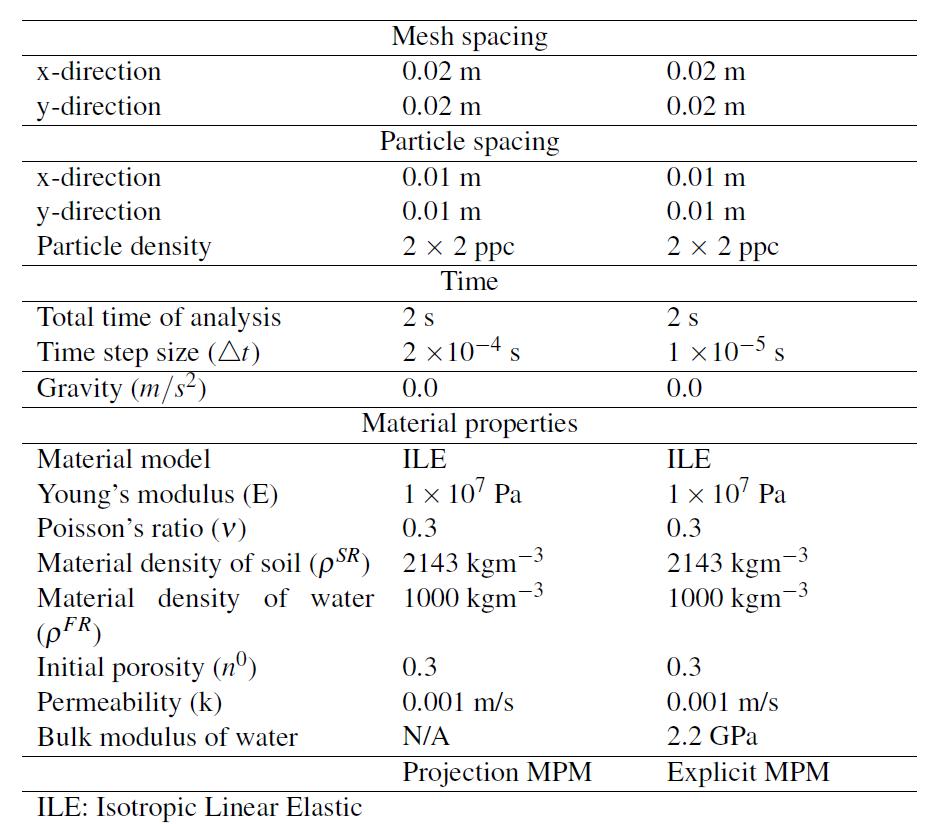

In [3]:
Image("Material.png")

Note that in this run, $ \nu = 0.0 $ instead of the value given in the table.

The results of MPM simulation is compared against 1D Terzaghi's consolidation theory. The equation is given as follow

$$ \frac{\partial u}{\partial t} = C_v \frac{\partial^2 u}{\partial x^2}$$

The following few equations are needed to obtain analytical solutions

$$ C_v = \frac{k}{\gamma_w m_v} $$
$$ m_v = \frac{1}{E_{oed}} $$
$$ E_{oed} = E\frac{(2 - 2\nu)}{(2 + 2\nu)(1 - 2\nu)} $$

- $ u $ is fluid (water) pressure  
- $ t $ is time
- $ z $ is depth of the body
- $ k $ is hydraulic conductivity of the water
- $ \gamma_w $ is unit weight of water
- $ m_v $ is compressibility ratio or coefficient, an
- $ E_{oed} $ is the oedemeter modulus
- $ E $ is Young's modulus
- $ \nu $ is Poisson ratio

Given the material properties, we now have

$$ C_v = 1.020 \mathrm{ m^2/s}$$

In [4]:
# Getting more data

smoothing_mpm_usl_2Eneg2 = np.genfromtxt('smoothing/mpm_usl/2Eneg2.csv', delimiter=',')
smoothing_mpm_usl_2Eneg1 = np.genfromtxt('smoothing/mpm_usl/2Eneg1.csv', delimiter=',')
smoothing_mpm_usl_2Eneg0 = np.genfromtxt('smoothing/mpm_usl/2Eneg0.csv', delimiter=',')

smoothing_mpm_usf_2Eneg2 = np.genfromtxt('smoothing/mpm_usf/2Eneg2.csv', delimiter=',')
smoothing_mpm_usf_2Eneg1 = np.genfromtxt('smoothing/mpm_usf/2Eneg1.csv', delimiter=',')
smoothing_mpm_usf_2Eneg0 = np.genfromtxt('smoothing/mpm_usf/2Eneg0.csv', delimiter=',')

nosmoothing_mpm_usl_2Eneg2 = np.genfromtxt('nosmoothing/mpm_usl/2Eneg2.csv', delimiter=',')
nosmoothing_mpm_usl_2Eneg1 = np.genfromtxt('nosmoothing/mpm_usl/2Eneg1.csv', delimiter=',')
nosmoothing_mpm_usl_2Eneg0 = np.genfromtxt('nosmoothing/mpm_usl/2Eneg0.csv', delimiter=',')

nosmoothing_mpm_usf_2Eneg2 = np.genfromtxt('nosmoothing/mpm_usf/2Eneg2.csv', delimiter=',')
nosmoothing_mpm_usf_2Eneg1 = np.genfromtxt('nosmoothing/mpm_usf/2Eneg1.csv', delimiter=',')
nosmoothing_mpm_usf_2Eneg0 = np.genfromtxt('nosmoothing/mpm_usf/2Eneg0.csv', delimiter=',')

analytical_2Eneg2 = np.genfromtxt('analytical/2Eneg2.csv', delimiter=',')
analytical_2Eneg1 = np.genfromtxt('analytical/2Eneg1.csv', delimiter=',')
analytical_2Eneg0 = np.genfromtxt('analytical/2Eneg0.csv', delimiter=',')


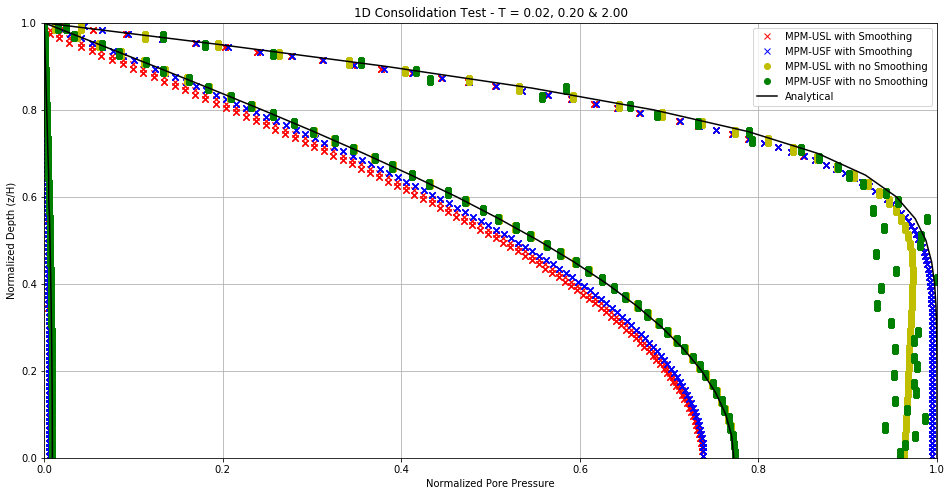

In [6]:
# Plot Comparison

plt.figure(figsize=(16,8))

plt.plot(smoothing_mpm_usl_2Eneg2[:,2], smoothing_mpm_usl_2Eneg2[:,0], 'rx', label='MPM-USL with Smoothing')
plt.plot(smoothing_mpm_usl_2Eneg1[:,2], smoothing_mpm_usl_2Eneg1[:,0], 'rx')
plt.plot(smoothing_mpm_usl_2Eneg0[:,2], smoothing_mpm_usl_2Eneg0[:,0], 'rx')
plt.plot(smoothing_mpm_usf_2Eneg2[:,2], smoothing_mpm_usf_2Eneg2[:,0], 'bx', label='MPM-USF with Smoothing')
plt.plot(smoothing_mpm_usf_2Eneg1[:,2], smoothing_mpm_usf_2Eneg1[:,0], 'bx')
plt.plot(smoothing_mpm_usf_2Eneg0[:,2], smoothing_mpm_usf_2Eneg0[:,0], 'bx')
plt.plot(nosmoothing_mpm_usl_2Eneg2[:,2], nosmoothing_mpm_usl_2Eneg2[:,0], 'yo', label='MPM-USL with no Smoothing')
plt.plot(nosmoothing_mpm_usl_2Eneg1[:,2], nosmoothing_mpm_usl_2Eneg1[:,0], 'yo')
plt.plot(nosmoothing_mpm_usl_2Eneg0[:,2], nosmoothing_mpm_usl_2Eneg0[:,0], 'yo')
plt.plot(nosmoothing_mpm_usf_2Eneg2[:,2], nosmoothing_mpm_usf_2Eneg2[:,0], 'go', label='MPM-USF with no Smoothing')
plt.plot(nosmoothing_mpm_usf_2Eneg1[:,2], nosmoothing_mpm_usf_2Eneg1[:,0], 'go')
plt.plot(nosmoothing_mpm_usf_2Eneg0[:,2], nosmoothing_mpm_usf_2Eneg0[:,0], 'go')
plt.plot(1-analytical_2Eneg2[:,1],1-analytical_2Eneg1[:,0], 'k', label='Analytical')
plt.plot(1-analytical_2Eneg1[:,1],1-analytical_2Eneg1[:,0], 'k')
plt.plot(1-analytical_2Eneg0[:,1],1-analytical_2Eneg1[:,0], 'k')
plt.axis([0, 1, 0, 1])
plt.legend(loc='upper right')
plt.title('1D Consolidation Test - T = 0.02, 0.20 & 2.00')
plt.xlabel('Normalized Pore Pressure')
plt.ylabel('Normalized Depth (z/H)')
plt.grid(True)

plt.show()